
# <center> <font color=darkkhaki>Compte rendu TP3: Linear Regression</font></center>
# <center> <font color=grey>mariem romdhane 3dni1</font></center>

# <font color=blue>Example 1</font>

Determining the linear relationship between two variables (Gravity constant of the earth).
Let’s think back to physics class in school. There, we learned that the gravitation of the
earth accelerates the speed of every falling object by a constant g of about g =9:801m/s2
near the equator. This means that a falling object freely increases its velocity by 9.801 m/s2
per second it falls.
School was a long time ago for most of us; however, and so now, we check this basic
constant again, with the help of regression analysis. According to physics, there is a linear
relationship, h =gxS, where h is the height from which an object is falling, and S is the
squared time in seconds that the object needs to reach the ground.
In this example, there is only a single input variable, and so these kinds of models are
called univariate or simple; but regression models can also be used to estimate more
complex linear variable connections. In these cases, the models are called multiple linear
regression models.


In [1]:
import pandas as pd
df = pd.read_csv("grav.csv")

In [2]:
df.head()

,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


In [3]:
import pandas as pd
df = pd.read_csv("grav.csv")
#selection de la première colonne de notre dataset (la taille de la population)
X = df.iloc[0:len(df),0]
#selection de deuxième colonnes de notre dataset (le profit effectué)
Y = df.iloc[0:len(df),1] 


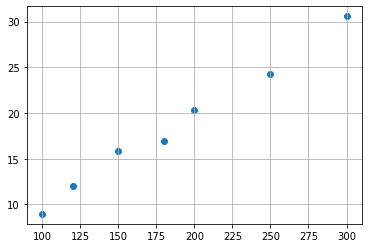

In [4]:
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

In [5]:
from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

In [6]:
def predict(x):
   return slope * x + intercept

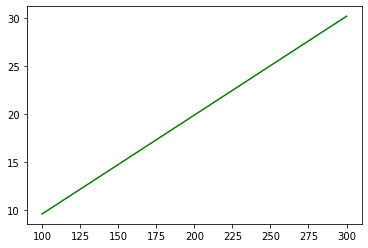

In [7]:
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
fitLine = predict(X)
plt.plot(X, fitLine, c='g')

In [8]:
import numpy as np
parametres = np.polyfit(X, Y, 1)
print(parametres)
a, b = parametres
print("a = {:8.3f}\nb = {:8.3f}".format(a, b))

[ 0.10280913 -0.68012324]
a =    0.103
b =   -0.680


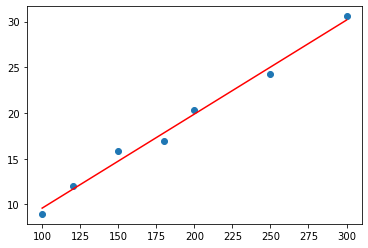

In [9]:
# Visualizing the regression line
plt.scatter(X, Y)
plt.plot(X, -0.68012324 +  0.10280913*X, 'r')
plt.show()

# <font color=blue>Example 2</font>

Determination of variable relations and prediction of variables (Analysis of pretest and final
exam results).
Students often prepare for exams by taking tests in advance. This gives students the opportunity to become familiar with the type and complexity of questions asked, as well as a
chance to check their degree of readiness for the final exam.
To find out if pretesting is helpful, we can inspect the relationship between the performances in both exams. As well as measuring with an appropriate correlation coefficient, we
can model the exact relationship using linear regression.
In addition, we are interested in a prediction of the final exam scores from future students,
based on their pretest scores. This can be done by applying the build regression model on
this new dataset of pretest results. We provides a dataset called “test_scores.sav” , which
comprises data for the kind of analysis described here.

## Correlation coefficien

In [10]:
import pandas as pd
df = pd.read_csv("test_scores.csv")

In [11]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0


In [12]:
import pandas as pd
df = pd.read_csv("test_scores.csv")
#selection de la première colonne de notre dataset (la taille de la population)
X = df.iloc[0:len(df),9]
#selection de deuxième colonnes de notre dataset (le profit effectué)
Y = df.iloc[0:len(df),10] 


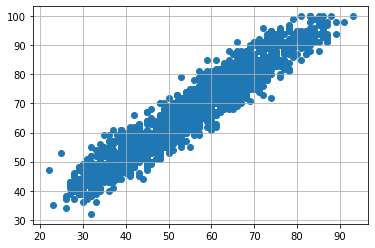

In [13]:
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

In [14]:
from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

In [15]:
def predict(x):
   return slope * x + intercept

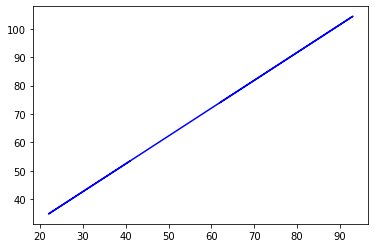

In [16]:
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
fitLine = predict(X)
plt.plot(X, fitLine, c='b')

In [17]:
import numpy as np
parametres = np.polyfit(X, Y, 1)
print(parametres)
a, b = parametres
print("a = {:8.3f}\nb = {:8.3f}".format(a, b))

[ 0.98058824 13.21306414]
a =    0.981
b =   13.213


### Test:



In [18]:
def linear(x):
  return 0.981*x+13.213

print(linear(70))

81.883


## Linear regression

In [19]:
# extraction de X_train (n_samples, n_features) et y_train (target variable)
X = df[["pretest"]]
y = df["posttest"].to_numpy() 
print('X_train:', X.shape, '; y_train:', np.shape(y))

X_train: (2133, 1) ; y_train: (2133,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1706, 1), (427, 1), (1706,), (427,))

In [21]:
from sklearn.linear_model import LinearRegression
#Création d'une instance (le modèle lin_reg) par le constructeur LinearRegression() 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
#Prédiction des les données d'apprentissage X_train par la méthode .predict()
y_pred = lin_reg.predict(X_train)
y_pred_t = lin_reg.predict(X_test)
print('y_pred:', y_pred.shape, '; y_pred_t:', np.shape(y_pred_t))

y_pred: (1706,) ; y_pred_t: (427,)


### Test

In [22]:
yy = lin_reg.predict([[70]])
print(yy)

[81.89679437]


# <font color='blue'>Exercise 3:</font> 

Linear Regression with the Regression Node In this exercise, we build a regression model for the
Boston housing data, housing.data.txt , with the Regression node.
1. Import the data and specify the variable types with the Type node.
2. Add a Regression node to the stream and select MEDV as the target variable and all other variables as the
input.
3. Choose the Backwards method to find the significant input variables and then run the stream.
4. Inspect the model nugget and identify the estimated coefficients and the regression equation. Which variables are included in the final model, and which variable has a coefficient of 3.832?
5. What is the value of R2 and the adjusted R2 ?
The following exercise is optional and includes adding a cross-validation to the
stream.
6. Include a Partition node in the stream and divide the dataset into 70 % training data and 30 % test data.
7. Select the partition field in the Fields tab of the Regression node, setting it to use only the training data in
the model building procedure.
8. Add an Analysis node to the model nugget and run the stream again. Is the model suitable for processing
unknown data?

## 1)

In [23]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# Importing the Boston Housing dataset
import pandas as pd
df = pd.read_csv("housing.data.txt")


In [25]:
df.head()

,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CIRM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 2)

In [27]:
# extraction de X_train (n_samples, n_features) et y_train (target variable)
X_train = df.drop("MEDV", axis=1) 
y_train = df["MEDV"].to_numpy() 
print('X_train:', X_train.shape, '; y_train:', np.shape(y_train))

X_train: (506, 13) ; y_train: (506,)


In [28]:
# extraction de X_test et y_test
X_test= df.drop("MEDV", axis=1) 
y_test = df["MEDV"].to_numpy() 
print('X_test:', X_test.shape, '; y_test:', np.shape(y_test))

X_test: (506, 13) ; y_test: (506,)


In [29]:
#Check the shape of dataframe
df.shape

(506, 14)

In [30]:
# Identifying the unique number of values in the dataset
df.nunique()

CIRM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [31]:
# Check for missing values
df.isnull().sum()

CIRM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [32]:
# See rows with missing values
df[df.isnull().any(axis=1)]

,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


## 3) et 4)

In [33]:
# Viewing the data statistics
df.describe()

,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326718,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [34]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape


(14, 14)

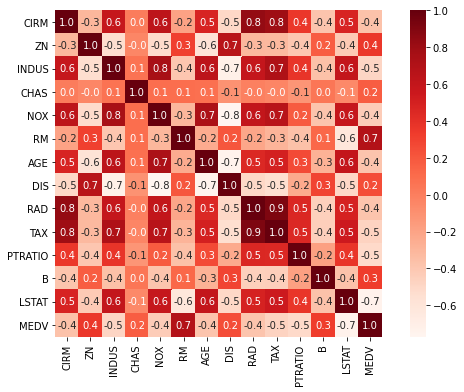

In [35]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,6))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap=plt.cm.Reds)

In [36]:
#Correlation with output variable
cor = df.corr()
cor_target = abs(cor["MEDV"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

### remarque:
###### seulement RM, PATIO et LSTAT sont fortement corrélé avec MEDV donc il faut faire drop de ces features mais avant tout il faut etudier la correlation entres ces trois features si ces derniers sont fortement corrélé nous n'en gardons qu'un et en drop le reste.

In [37]:
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


#### remarque:
###### D'après le code ci-dessus, on voit que les variables RM et LSTAT sont fortement corrélées entre elles (-0,613808). Par conséquent, nous conserverions une seule variable et supprimerions l'autre. Nous garderons LSTAT puisque sa corrélation avec MEDV est supérieure à celle de RM.
###### Après avoir abandonné RM, nous nous retrouvons avec deux fonctionnalités, LSTAT et PTRATIO.

In [38]:
X = df[['LSTAT', 'PTRATIO']].to_numpy()
y = df["MEDV"].to_numpy() 
print('X:', X.shape, '; y:', np.shape(y))

X: (506, 2) ; y: (506,)


In [39]:
X

array([[ 4.98, 15.3 ],
       [ 9.14, 17.8 ],
       [ 4.03, 17.8 ],
       ...,
       [ 5.64, 21.  ],
       [ 6.48, 21.  ],
       [ 7.88, 21.  ]])

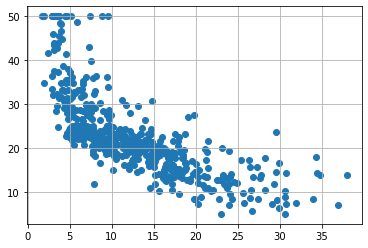

In [40]:
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X[:, 0],y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

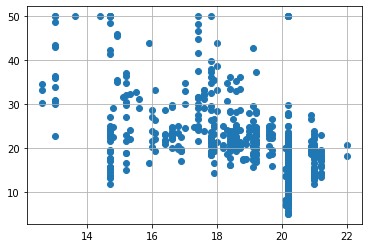

In [41]:
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X[:, 1],y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((404, 2), (102, 2), (404,), (102,))

###### chercher le variable qui a coefficient 3.832

In [43]:
from sklearn.linear_model import LinearRegression
#Création d'une instance (le modèle lin_reg) par le constructeur LinearRegression() 
xx=df.drop("MEDV", axis=1) 
yy=df["MEDV"].to_numpy() 
lin_reg = LinearRegression()
lin_reg.fit(xx, yy)
#Prédiction des les données d'apprentissage X_train par la méthode .predict()
#y_pred = lin_reg.predict(X_train)
#y_pred_t = lin_reg.predict(X_test)
print('x:', xx.shape, '; y:', np.shape(yy))

x: (506, 13) ; y: (506,)


In [44]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
print('Intercept: \n', lin_reg.intercept_)
print('Coefficients: \n', lin_reg.coef_)

Intercept: 
 34.98214365937199
Coefficients: 
 [-8.24018871e-02  4.28019470e-02  2.97062579e-02  2.82753069e+00
 -1.66956044e+01  3.86229930e+00  7.17230455e-04 -1.39629728e+00
  2.65322847e-01 -1.21579146e-02 -9.44501537e-01  1.04233726e-02
 -5.48474742e-01]


##### On a inclue seulement les deux variables LSTAT et PTRATIO.

In [52]:
from sklearn.linear_model import LinearRegression
#Création d'une instance (le modèle lin_reg) par le constructeur LinearRegression() 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
#Prédiction des les données d'apprentissage X_train par la méthode .predict()
y_pred = lin_reg.predict(X_train)
y_pred_t = lin_reg.predict(X_test)
print('X_train:', X_train.shape, '; y_train:', np.shape(y_train))

X_train: (354, 2) ; y_train: (354,)


###### les coefficients des variables.

In [53]:
lin_reg.coef_

array([-0.80463795, -1.25041612])

##### intercept

In [54]:
lin_reg.intercept_

55.88733040208432

# 5)

In [55]:
# Model Evaluation
from sklearn.metrics import r2_score
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

R^2: 0.6252787523532745
Adjusted R^2: 0.6231435885490196


𝑅^2: C'est une mesure de la relation linéaire entre X et Y. Elle est interprétée comme la proportion de la variance dans la variable dépendante qui est prévisible à partir de la variable indépendante.

Ajusté 𝑅^2: Le R-carré ajusté compare le pouvoir explicatif des modèles de régression qui contiennent différents nombres de prédicteurs.

# 6)


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 2), (152, 2), (354,), (152,))

# 7)

In [57]:
from sklearn.linear_model import LinearRegression
print(LinearRegression().get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [58]:
from sklearn.pipeline import Pipeline
# K-fold cross-validation et GridSearchCV
pipelines = []
params = []
names = []
#
# ajouter LinearRegression
pipelines.append(Pipeline([('clf', LinearRegression())])) ### LinearRegression
params.append({'clf__normalize':[True, False]})
names.append('LinearRegression')
pipelines.append(Pipeline([('clf', LinearRegression())])) ### LinearRegression
params.append({'clf__fit_intercept': [True, False]})
names.append('LinearRegression')

In [59]:
# l'enraînement avec cross-validation

#n_jobs = -1 signifie que le calcul sera distribué sur tous les CPU de l'ordinateur.

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

def model(pipeline, parameters, name, X, y):    
    cv = KFold(n_splits=5, shuffle=True, random_state=32)
    grid_obj = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=cv, scoring='r2', n_jobs=-1)
    grid_obj.fit(X,y)  
    print(name, 'R2:', grid_obj.best_score_)
    estimator = grid_obj.best_estimator_
    estimator.fit(X,y) # training sur tout training dataset
    return estimator 
estimators = []
for i in range(len(pipelines)):    
    estimators.append(model(pipelines[i], params[i], names[i], X_train, y_train))

LinearRegression R2: 0.6133621162780372
LinearRegression R2: 0.6133621162780372


# 8)

In [60]:
x_true=[[3.5,0.2],[100,5],[150,20]]
lin_reg.predict(x_true)

array([ 52.82101434, -30.82854563, -89.81668517])